# CA2_Submission_Histograms(sns) using HDB dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np

In [54]:
# Load the data
df = pd.read_csv("MedianResalePricesforRegisteredApplicationsbyTownandFlatType.csv")
df.head()

,quarter,town,flat_type,price
0,2007-Q2,Ang Mo Kio,1-room,na
1,2007-Q2,Ang Mo Kio,2-room,-
2,2007-Q2,Ang Mo Kio,3-room,172000
3,2007-Q2,Ang Mo Kio,4-room,260000
4,2007-Q2,Ang Mo Kio,5-room,372000


In [55]:
### Text-based Analysis Summary using Pandas ###

# Display shape of the dataset
print("<< This is the shape of the dataset >>")
print(df.shape)
print()

# Display index range
print("<< This is the index of the dataset >>")
print(df.index)
print()

# Display all columns in the dataset
print("<< These are the columns in the dataset >>")
print(df.columns)
print()

# Display summary of the dataset
print("<< A summary of this dataset is shown below >>")
print(df.info())
print()

# Count total number of non-NA (non-null) values in the dataset
print("<< The total number of non-NA values in this dataset >>")
print(df.count())
print()

# Display statistical summary of the quantitative variables columns
print("<< A descriptive statistical summary of the quantitative data in this dataset >>")
df[['price']].describe()


<< This is the shape of the dataset >>
(10608, 4)

<< This is the index of the dataset >>
RangeIndex(start=0, stop=10608, step=1)

<< These are the columns in the dataset >>
Index(['quarter', 'town', 'flat_type', 'price'], dtype='object')

<< A summary of this dataset is shown below >>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10608 entries, 0 to 10607
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   quarter    10608 non-null  object
 1   town       10608 non-null  object
 2   flat_type  10608 non-null  object
 3   price      10345 non-null  object
dtypes: object(4)
memory usage: 331.6+ KB
None

<< The total number of non-NA values in this dataset >>
quarter      10608
town         10608
flat_type    10608
price        10345
dtype: int64

<< A descriptive statistical summary of the quantitative data in this dataset >>


,price
count,10345
unique,1292
top,-
freq,2894


In [56]:
# Clean up non-numeric values in column 'price' and convert useable variables from non-numeric to numeric
# Drop out rows where column 'price' is 0

# Convert 'price' column to numeric, forcing non-numeric values to NaN ('errors=coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Drop rows with NaN values in 'price' column
df = df.dropna(subset=['price'])

# Drop rows where 'price' is 0
df = df[df['price'] != 0]

# Display descriptive statistics
print(df[['price']].describe())

              price
count  4.883000e+03
mean   4.603346e+05
std    1.509228e+05
min    1.360000e+05
25%    3.460000e+05
50%    4.370000e+05
75%    5.522500e+05
max    1.045000e+06


In [57]:
df.head()

,quarter,town,flat_type,price
2,2007-Q2,Ang Mo Kio,3-room,172000.0
3,2007-Q2,Ang Mo Kio,4-room,260000.0
4,2007-Q2,Ang Mo Kio,5-room,372000.0
8,2007-Q2,Bedok,3-room,172000.0
9,2007-Q2,Bedok,4-room,224500.0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4883 entries, 2 to 10607
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   quarter    4883 non-null   object 
 1   town       4883 non-null   object 
 2   flat_type  4883 non-null   object 
 3   price      4883 non-null   float64
dtypes: float64(1), object(3)
memory usage: 190.7+ KB


In [59]:
unique_types = df['flat_type'].unique()
unique_types

array(['3-room', '4-room', '5-room', 'Executive', '2-room'], dtype=object)

In [60]:
# Redo Analysis Summary after data clean up

### Text-based Analysis Summary using Pandas ###

# Display shape of the dataset
print("<< This is the shape of the dataset >>")
print(df.shape)
print()

# Display index range
print("<< This is the index of the dataset >>")
print(df.index)
print()

# Display all columns in the dataset
print("<< These are the columns in the dataset >>")
print(df.columns)
print()

# Display summary of the dataset
print("<< A summary of this dataset is shown below >>")
print(df.info())
print()

# Count total number of non-NA (non-null) values in the dataset
print("<< The total number of non-NA values in this dataset >>")
print(df.count())
print()

# Display statistical summary of the quantitative variables columns
print("<< A descriptive statistical summary of the quantitative data in this dataset >>")
df[['price']].describe()


<< This is the shape of the dataset >>
(4883, 4)

<< This is the index of the dataset >>
Index([    2,     3,     4,     8,     9,    10,    11,    14,    15,    16,
       ...
       10594, 10598, 10599, 10600, 10601, 10603, 10604, 10605, 10606, 10607],
      dtype='int64', length=4883)

<< These are the columns in the dataset >>
Index(['quarter', 'town', 'flat_type', 'price'], dtype='object')

<< A summary of this dataset is shown below >>
<class 'pandas.core.frame.DataFrame'>
Index: 4883 entries, 2 to 10607
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   quarter    4883 non-null   object 
 1   town       4883 non-null   object 
 2   flat_type  4883 non-null   object 
 3   price      4883 non-null   float64
dtypes: float64(1), object(3)
memory usage: 190.7+ KB
None

<< The total number of non-NA values in this dataset >>
quarter      4883
town         4883
flat_type    4883
price        4883
dtype: int64

<< A descr

,price
count,4.883000e+03
mean,4.603346e+05
std,1.509228e+05
min,1.360000e+05
25%,3.460000e+05
50%,4.370000e+05
75%,5.522500e+05
max,1.045000e+06


In [61]:
req_data = df[['town', 'flat_type', 'price']]

In [62]:
req_data

,town,flat_type,price
2,Ang Mo Kio,3-room,172000.0
3,Ang Mo Kio,4-room,260000.0
4,Ang Mo Kio,5-room,372000.0
8,Bedok,3-room,172000.0
9,Bedok,4-room,224500.0
...,...,...,...
10603,YISHUN,2-room,330000.0
10604,YISHUN,3-room,403400.0
10605,YISHUN,4-room,535000.0
10606,YISHUN,5-room,650000.0


In [63]:
wanted_flattype = ['3-room', '4-room', '5-room']
df1 = df[df['flat_type'].isin(wanted_flattype)]

In [64]:
df1

,quarter,town,flat_type,price
2,2007-Q2,Ang Mo Kio,3-room,172000.0
3,2007-Q2,Ang Mo Kio,4-room,260000.0
4,2007-Q2,Ang Mo Kio,5-room,372000.0
8,2007-Q2,Bedok,3-room,172000.0
9,2007-Q2,Bedok,4-room,224500.0
...,...,...,...,...
10599,2024-Q1,WOODLANDS,4-room,512000.0
10600,2024-Q1,WOODLANDS,5-room,615000.0
10604,2024-Q1,YISHUN,3-room,403400.0
10605,2024-Q1,YISHUN,4-room,535000.0


In [65]:
# final dataset for plotting Histogram
df2 = df1[['flat_type', 'price']]
df2

,flat_type,price
2,3-room,172000.0
3,4-room,260000.0
4,5-room,372000.0
8,3-room,172000.0
9,4-room,224500.0
...,...,...
10599,4-room,512000.0
10600,5-room,615000.0
10604,3-room,403400.0
10605,4-room,535000.0


In [66]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4218 entries, 2 to 10606
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   flat_type  4218 non-null   object 
 1   price      4218 non-null   float64
dtypes: float64(1), object(1)
memory usage: 98.9+ KB


Bins for 3-room: [151500. 186350. 221200. 256050. 290900. 325750. 360600. 395450. 430300.
 465150. 500000.]
Data for 3-room: count      1292.000000
mean     314900.000000
std       60296.579039
min      151500.000000
25%      277000.000000
50%      318000.000000
75%      355000.000000
max      500000.000000
Name: price, dtype: float64
Bins for 4-room: [200000. 277250. 354500. 431750. 509000. 586250. 663500. 740750. 818000.
 895250. 972500.]
Data for 4-room: count      1589.000000
mean     457479.137823
std      125438.838953
min      200000.000000
25%      376000.000000
50%      431500.000000
75%      514000.000000
max      972500.000000
Name: price, dtype: float64
Bins for 5-room: [273800. 342320. 410840. 479360. 547880. 616400. 684920. 753440. 821960.
 890480. 959000.]
Data for 5-room: count      1337.000000
mean     544754.151085
std      136733.413699
min      273800.000000
25%      450000.000000
50%      520000.000000
75%      622000.000000
max      959000.000000
Name: price, dtyp

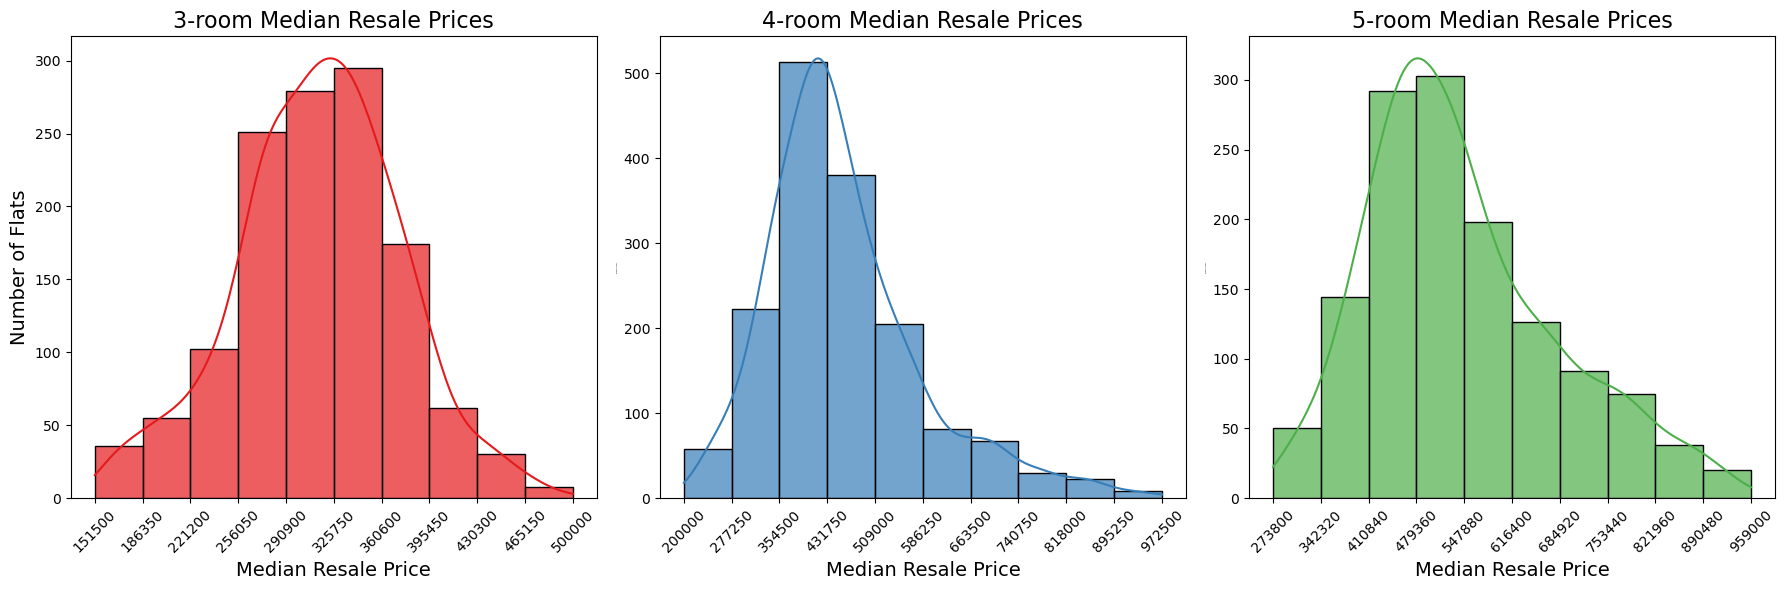

In [67]:
#Plotting Histogram chart

# Set up the matplotlib figure
plt.figure(figsize=(18, 6))

# Number of bins (Bins are intervals that divide the data into ranges for visualization)
num_bins = 10

# Plot histograms for each flat type with fixed number of bins
for i, flat_type in enumerate(wanted_flattype):
    plt.subplot(1, 3, i+1)  # Adding 1 to i converts the zero-based index to a one-based index for plt.subplot
    data = df2[df2['flat_type'] == flat_type]['price']
    
    # Calculate the bins based on the range of prices
    min_price = (data.min())
    max_price = (data.max())
    
    # Create bins with fixed edges
    bins = np.linspace(min_price, max_price, num_bins+1) #(num_bins+1) evenly spaced bins between min_price and max_price
    
    # Print bins and descriptive statistics of data
    print(f'Bins for {flat_type}:', bins)
    print(f'Data for {flat_type}:', data.describe())

    # Plot histogram (KDE:Kernel Density Estimate)
    sns.histplot(data, bins=bins, kde=True, color=sns.color_palette("Set1")[i], alpha=0.7)
    plt.title(f'{flat_type} Median Resale Prices', fontsize=16)
    plt.xlabel('Median Resale Price', fontsize=14)
    plt.ylabel('Number of Flats', fontsize=14 if i == 0 else 0)
    plt.xticks(bins, rotation=45)

# Adjust layout to avoid overlapping of subplots and clipping of labels
plt.tight_layout()

# Show the plot
plt.show()